In [992]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import itertools 
import networkx as nx

In [936]:
sim1 = pd.read_csv('/home/rute/Pesquisa/data_dezembro/simout_1.csv')

In [896]:
def plot_mat_corrs(figsize, annot, matrix):
    f, ax = plt.subplots(figsize=figsize)
    cmap = sns.diverging_palette(150, 275, s=80, l=55, as_cmap=True)
    sns.heatmap(matrix, cmap=cmap, center=0, annot=annot)
    plt.show()

In [937]:
def plot_stem_corrs(x, y, figsize, labels, ang_rot_lbls):
    x = [i for i in np.arange(0, len(y))]
    plt.figure(figsize=figsize)
    plt.stem(x,y, linefmt='b-', markerfmt='bo', basefmt='r-')
    plt.xticks(x, labels, rotation='60')
    plt.show()

In [1073]:
def sig_corr(x1, x2, wlag, t_amostragem,x,y):
    correlations = np.zeros(wlag)
    for i in np.arange(0, wlag):
        correlations[i] = (1/(len(x1) - i))*np.dot(x1[i:],x2[:(len(x2) - i)])
    max_index = np.argmax(np.abs(correlations))
    return ([max_index*t_amostragem, np.round(correlations[max_index],2)])

In [4]:
def normalize_dfs(dfs):
    all_dfs = pd.concat(dfs)
    norm_dfs = []
   
    all_dfs_norm =  (all_dfs - all_dfs.mean())/all_dfs.std()
    all_dfs_norm['tout'] = all_dfs['tout']
    
    num_linhas = int(len(all_dfs)/len(dfs))
    num_blocks = int(len(all_dfs)/len(dfs[0]))
    
    for i in np.arange(0, num_blocks):
        df = all_dfs_norm.iloc[(i*num_linhas) : (i*num_linhas + num_linhas),:]
        norm_dfs.append(df)
    return norm_dfs
        

In [717]:
def get_dfs(init, end):
    dfs = []
    for i in np.arange(init,end + 1):
        dfs.append(pd.read_csv('/home/rute/Pesquisa/data_dezembro/simout_' + str(i) + '.csv'))
    return dfs

In [6]:
def dfs_by_ft(init):
    dfs_ft = []
    for i in np.arange(init, init + 41, 10):
        dfs_ft.append(get_dfs(i, i+10))
    return dfs_ft


In [1074]:
def mean_correlation(wlag, dfs = []):
    matrix_corr_list = []
    m_sum_complete = np.zeros([22 , 22, 4])
    dfs_norm = normalize_dfs(dfs)
    
    for df in dfs_norm:
        tam_m = int(len(df.columns[1:23]))
        m_corr = np.zeros((tam_m,tam_m,4))
        for i, x in enumerate(df.columns[1:23]):
            for j, y in enumerate(df.columns[1:23]):
                corr = sig_corr(np.array(df[x]), np.array(df[y]),wlag, 0.01, x, y)
                corr.extend([0,0])
                m_corr[i][j] = corr
        matrix_corr_list.append(m_corr)
    
    for m in matrix_corr_list:
        m[:,:,1] = m[:,:,1]/np.diagonal(m[:,:,1])

    m_mean = np.round(np.mean(matrix_corr_list, axis =0),2)
    m_std = np.std(matrix_corr_list, axis=0)

    for i in np.arange(0, len(m_mean)):
        for j in np.arange(0, len(m_mean)):
            m_mean[i][j][2] = m_std[i][j][0]
            m_mean[i][j][3] = m_std[i][j][1]
    return m_mean

In [1100]:
def get_corrs_with_index( matrix, threshold = None):
    most_correlated_var = []
    for i in np.arange(0, len(matrix[:][:][1]), 1):
        for j in np.arange(0, len(matrix[:][:][1]), 1):
            if threshold == None:
                pair_value = (i, j, matrix[i][j][1], matrix[i][j][0])
                most_correlated_var.append(pair_value)
            elif (np.abs(matrix[i][j][1]) > threshold ):
                pair_value = (i, j, matrix[i][j][1], matrix[i][j][0])
                most_correlated_var.append(pair_value)
    return most_correlated_var   

In [842]:
def get_corr_var(matrix, vars):
    correlations = []
    for var in vars:
        correlations.append(matrix[int(var[0])][int(var[1])][1])
    return correlations    

#-----------------------------------------------------------------------------------------------------------------#

In [726]:
regular_sims = get_dfs(1,10)
disturb_1_sims = get_dfs(11,14)
disturb_2_sims = get_dfs(15,18)
disturb_3_sims = get_dfs(19,22)

In [1075]:
wlag = int(2/0.01)
corrs_reg_sims = mean_correlation(wlag, regular_sims)

In [1070]:
corrs_reg_sims[:,:,1]

array([[ 1.   ,  0.014, -0.   , -0.149, -0.069, -0.063, -0.133, -0.004,
         0.014, -0.225, -0.193,  0.004, -0.13 , -0.008, -0.042, -0.144,
        -0.008, -0.16 , -0.006, -0.287, -0.053, -0.134],
       [ 0.012,  1.   , -0.131, -0.002,  0.012,  0.011, -0.077, -0.008,
         0.023, -0.078,  0.031, -0.015, -0.074, -0.029, -0.021, -0.077,
        -0.015,  0.046, -0.003,  0.011, -0.174,  0.03 ],
       [ 0.003, -0.124,  1.   , -0.002, -0.01 , -0.022,  0.087,  0.   ,
        -0.047,  0.062, -0.038, -0.006,  0.085,  0.046, -0.019,  0.089,
        -0.015, -0.054,  0.008, -0.027,  0.191, -0.021],
       [-0.139,  0.001, -0.01 ,  1.   ,  0.021,  0.005,  0.077, -0.015,
         0.003,  0.049,  0.034, -0.   ,  0.079,  0.009,  0.008,  0.087,
         0.014, -0.013,  0.017,  0.012, -0.021,  0.009],
       [ 0.08 ,  0.021, -0.024, -0.025,  1.   ,  0.057,  0.021, -0.018,
         0.003, -0.032,  0.102, -0.031,  0.023, -0.045,  0.006, -0.005,
        -0.002,  0.139,  0.019,  0.158, -0.085,  0.1

In [934]:
#plot_mat_corrs((16,10), True, corrs_reg_sims[:,:,1])

In [1076]:
corrs_dist_1_25 = mean_correlation(wlag, [disturb_1_sims[0]])

In [1117]:
corrs_dist_2_25 = mean_correlation(wlag, [disturb_2_sims[0]])

In [1043]:
#plot_mat_corrs((16,10), True, corrs_dist_1_25[:,:,1])

In [1101]:
corrs_25_with_index = get_corrs_with_index(corrs_dist_1_25)

In [1118]:
corrs_25_with_index_d2 = get_corrs_with_index(corrs_dist_2_25)

In [1127]:
len(corrs_dist_1_25[:,:,1].flatten())

484

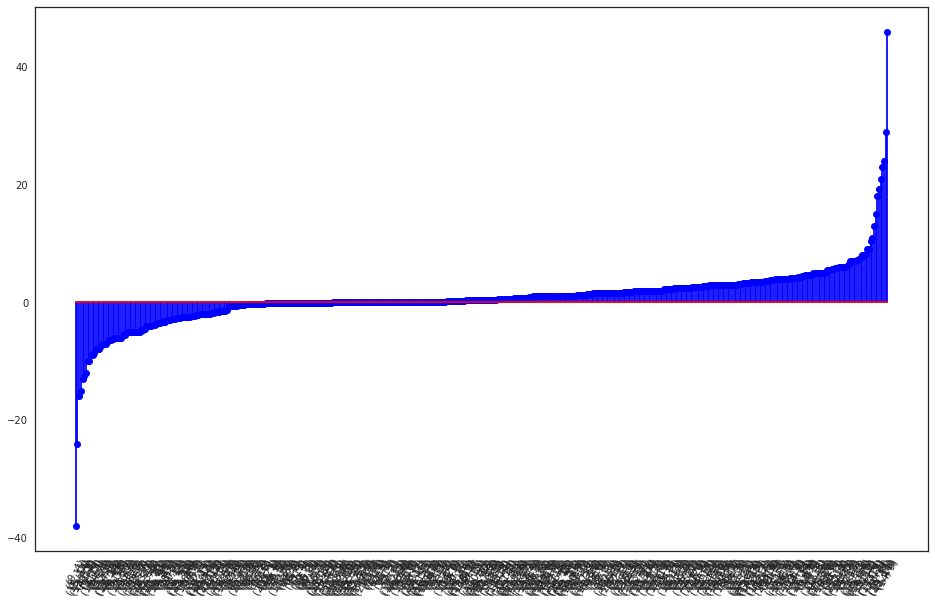

In [1142]:
percent_dif_0_25 = []

for  corr25, corr0_mean in zip(corrs_dist_1_25[:,:,1].flatten(), corrs_reg_sims[:,:,1].flatten()):
    if(corr0_mean != 0):
        percent_dif_0_25.append((corr25 - corr0_mean)/corr0_mean)
    else:
        percent_dif_0_25.append(corr25)

x = [i for i in np.arange(0, len(percent_dif_0_25))]
labels = [str((corr[0], corr[1])) for corr in corrs_25_with_index]

a = pd.Series(percent_dif_0_25, index=labels)
a.sort_values(inplace=True)
plot_stem_corrs(x,a,(16,10),a.index, 'vertical')

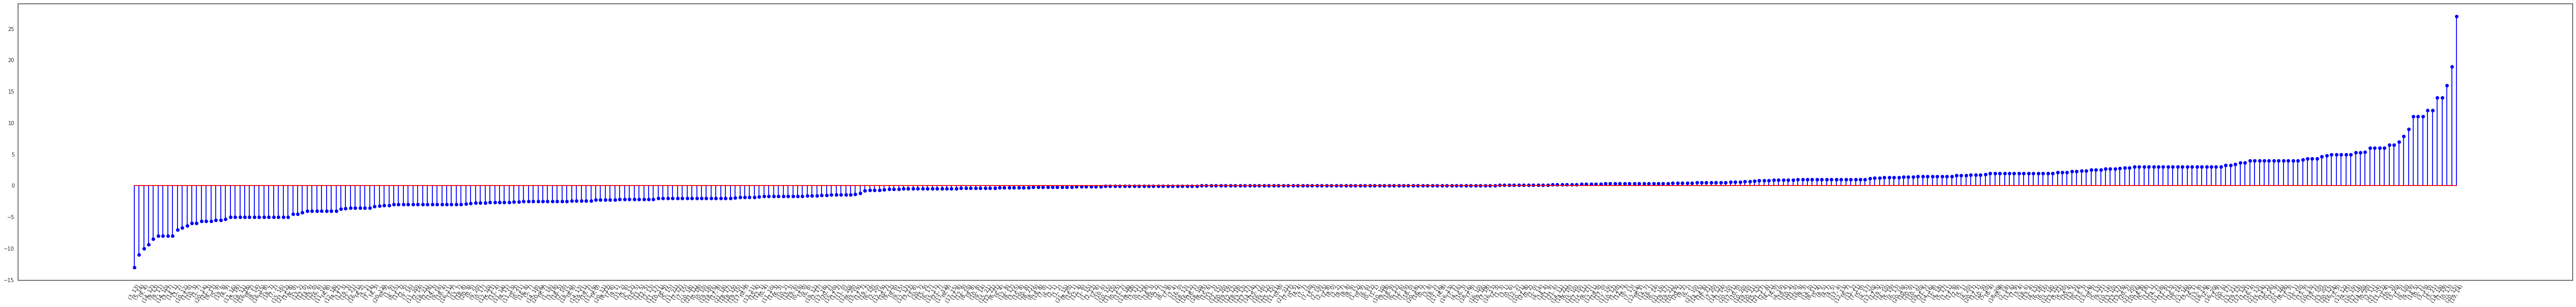

In [1141]:
percent_dif_0_25_d2 = []

for  corr25, corr0_mean in zip(corrs_dist_2_25[:,:,1].flatten(), corrs_reg_sims[:,:,1].flatten()):
    if(corr0_mean != 0):
        percent_dif_0_25_d2.append((corr25- corr0_mean)/corr0_mean)
    else:
        percent_dif_0_25_d2.append(corr25)

x = [i for i in np.arange(0, len(percent_dif_0_25_d2))]
labels = [str((corr[0], corr[1])) for corr in corrs_25_with_index_d2]

a = pd.Series(percent_dif_0_25_d2, index=labels)
a.sort_values(inplace=True)
plot_stem_corrs(x,a,(90,10),a.index, 'vertical')

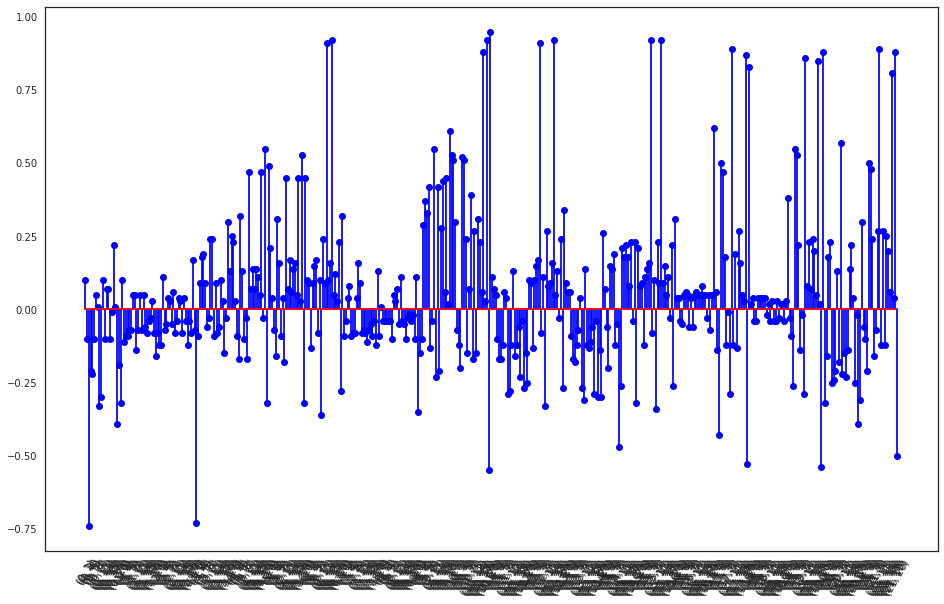

In [1059]:
y = [corr[2] for corr in corrs_25_with_index]
x = [i for i in np.arange(0, len(y))]
labels = [str((corr[0], corr[1])) for corr in corrs_25_with_index]

plot_stem_corrs(x,y,(16,10),labels, '90')

In [1094]:
#critical values set as mi +- 3sigma
sensi_vars = []
for  corr25, corr0_mean in zip(corrs_25_with_index, corrs_reg_sims[:,:,1].flatten()):
    if(corr0_mean != 0):
        if (corr25[3] - corr0_mean)/corr0_mean > 50:
            sensi_vars.append((corr25[0], corr25[1]))
    else:
        sensi_vars.append(corr25[0])

In [1095]:
len(sensi_vars)

80

#-----------------------------------------------------------------------------------------------------------------#

In [744]:
disturb_1 = get_dfs(11,14)

In [611]:
no_dist = get_dfs(1,1)
correlation_no_dist = mean_correlation(int(2/0.01), [no_dist[0]])

In [845]:
wlag = int(2/0.01)
dist = []
for sim_type in disturb_1:
    dist.append(mean_correlation(wlag, [sim_type]))

[[[ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  ..., 
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  ..., 
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  ..., 
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]]

 ..., 
 [[ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  ..., 
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  ..., 
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  ..., 
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]]]
[[[ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  ..., 
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  ..., 
  [ 0.  0.  0. 

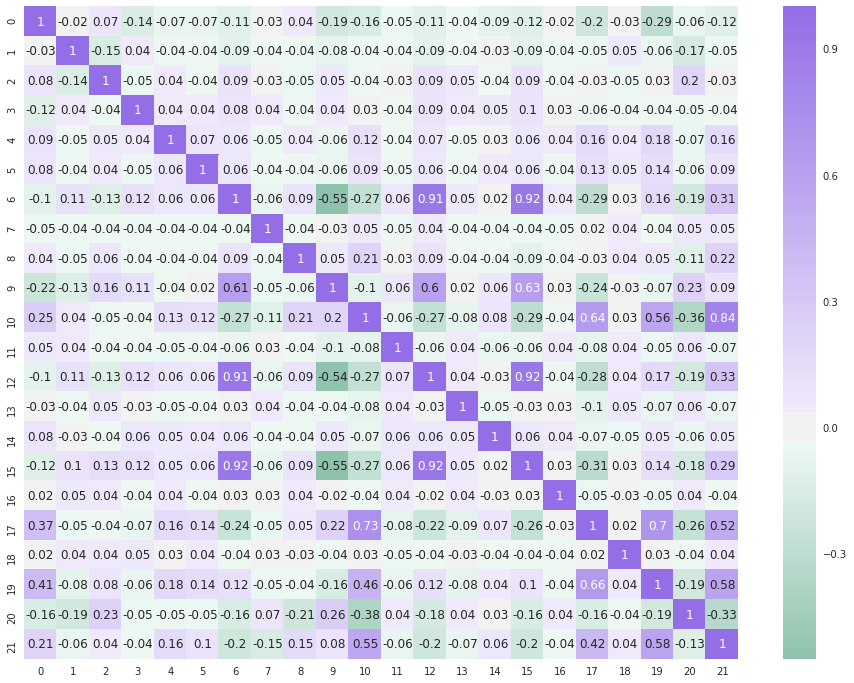

In [810]:
d_unit = correlation_no_dist[:,:,1]/np.diag(correlation_no_dist[:,:,1])
sns.set(style="white")
f, ax = plt.subplots(figsize=(16, 12))
cmap = sns.diverging_palette(150, 275, s=80, l=55, as_cmap=True)
sns.heatmap(d_unit, cmap=cmap, center=0, annot=True)
plt.show()

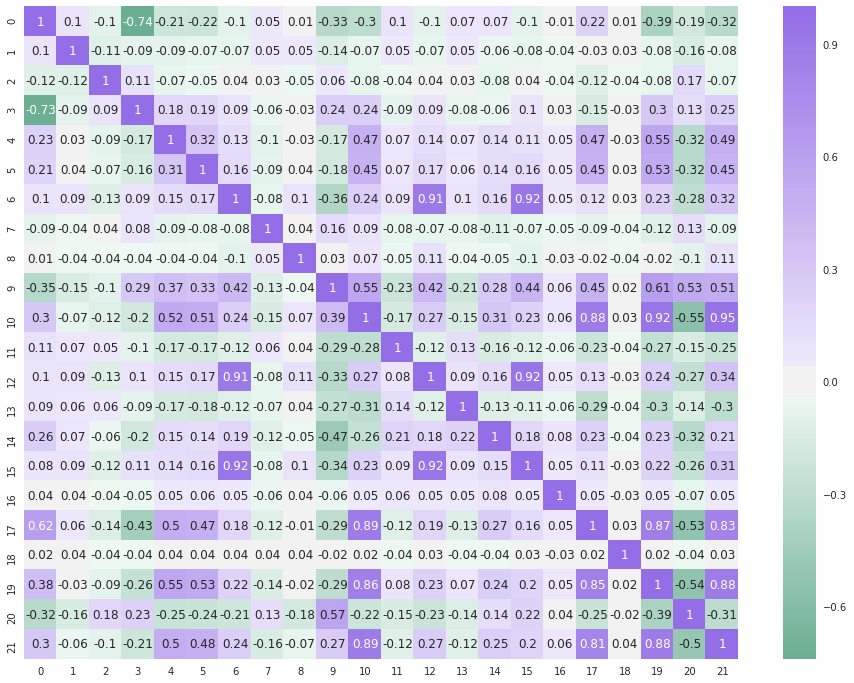

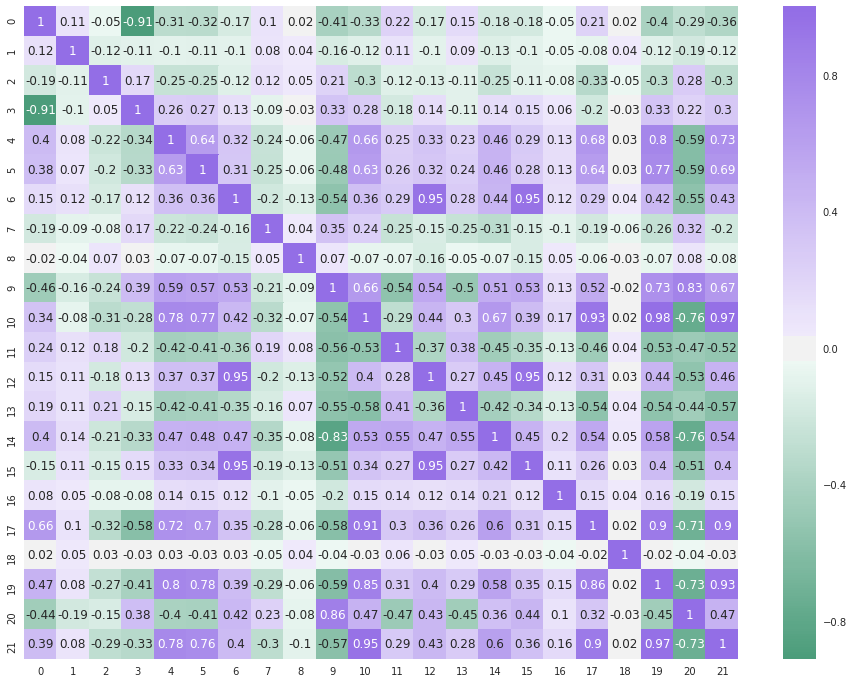

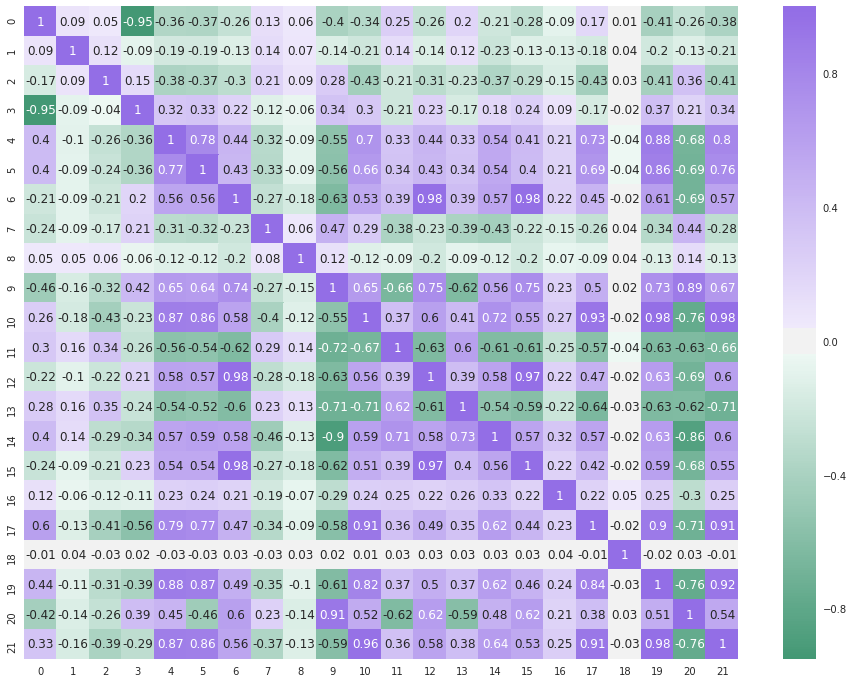

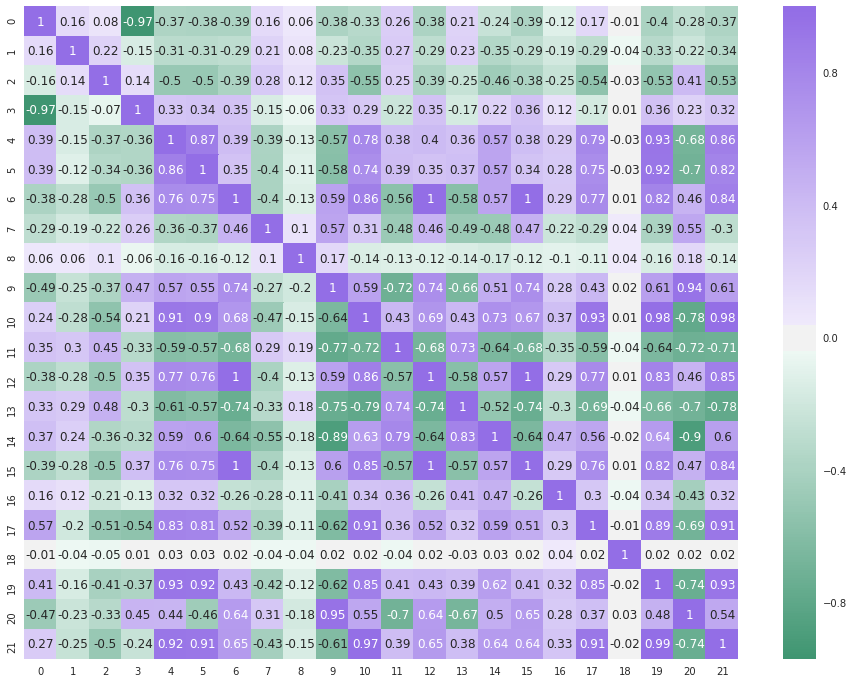

In [815]:
for d in dist:
    d_unit = d[:,:,1]/np.diag(d[:,:,1])
    sns.set(style="white")
    f, ax = plt.subplots(figsize=(16, 12))
    cmap = sns.diverging_palette(150, 275, s=80, l=55, as_cmap=True)
    sns.heatmap(d_unit, cmap=cmap, center=0, annot=True)
    plt.show()

In [13]:
most_correlated = get_most_corr_var(dist[0], 0.6)
most_correlated[:]

[(0, 3, -0.73999999999999999, 0.040000000000000001),
 (3, 0, -0.72999999999999998, 0.0),
 (6, 12, 0.91000000000000003, 0.0),
 (6, 15, 0.92000000000000004, 0.0),
 (9, 19, 0.60999999999999999, 2.0100000000000002),
 (10, 0, 0.68000000000000005, 4.7300000000000004),
 (10, 17, 0.88, 0.35000000000000003),
 (10, 19, 0.92000000000000004, 0.70000000000000007),
 (10, 21, 0.94999999999999996, 0.02),
 (12, 6, 0.91000000000000003, 0.0),
 (12, 15, 0.92000000000000004, 0.0),
 (15, 6, 0.92000000000000004, 0.0),
 (15, 12, 0.92000000000000004, 0.0),
 (17, 0, 0.85999999999999999, 4.4500000000000002),
 (17, 3, -0.63, 4.5300000000000002),
 (17, 10, 0.89000000000000001, 0.029999999999999999),
 (17, 19, 0.87, 0.38),
 (17, 21, 0.82999999999999996, 0.050000000000000003),
 (19, 0, 0.62, 4.7000000000000002),
 (19, 10, 0.85999999999999999, 0.0),
 (19, 17, 0.84999999999999998, 0.059999999999999998),
 (19, 21, 0.88, 0.0),
 (21, 0, 0.62, 4.8200000000000003),
 (21, 10, 0.89000000000000001, 0.0),
 (21, 17, 0.810000000

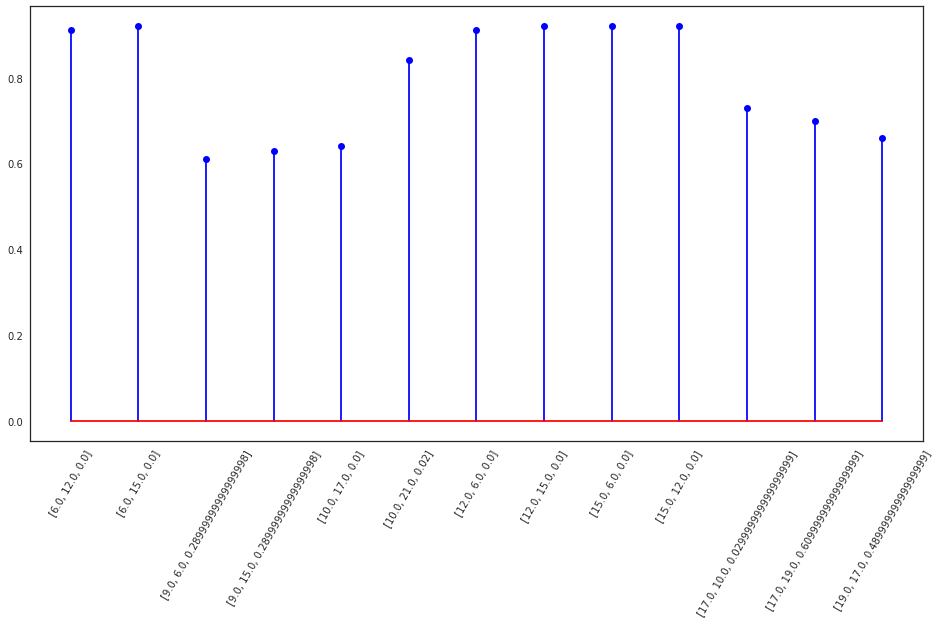

In [637]:
x = []
y = []
most_corr_no_dist = get_most_corr_var(0.6, correlation_no_dist)
for corr in most_corr_no_dist:
    x.append([corr[0],corr[1], (corr[3])])
    y.append(corr[2])

x_number = [i for i in np.arange(0, len(y))]
labels = [str(i) for i in x]
plt.figure(figsize=(16,8))
plt.stem(x_number,y, linefmt='b-', markerfmt='bo', basefmt='r-', rotation='horizontal')
plt.xticks(x_number, labels, rotation='60')

plt.show()

In [ ]:
most_corr_no_dist = get_most_corr_var

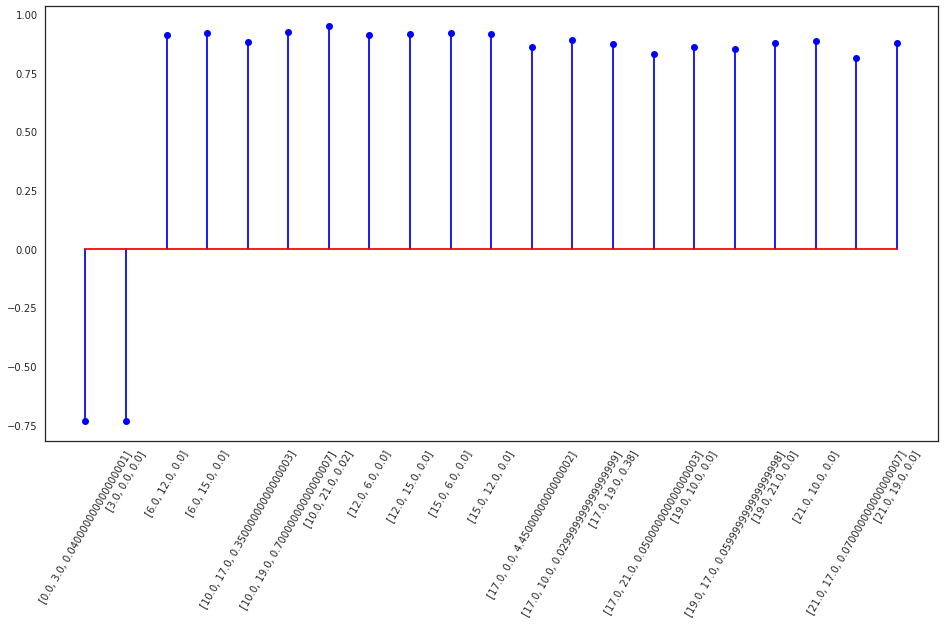

In [606]:
x = []
y = []
for corr in most_correlated:
    x.append([corr[0],corr[1], (corr[3])/1.0])
    y.append(corr[2])
    

x_number = [i for i in np.arange(0, len(y))]
labels = [str(i) for i in x]
plt.figure(figsize=(16,8))
plt.stem(x_number,y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xticks(x_number, labels, rotation='60')
plt.show()

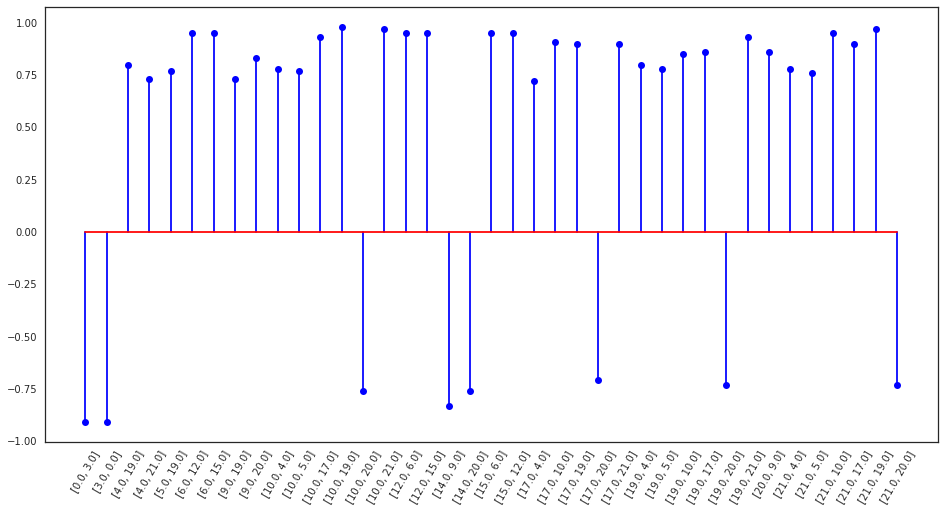

In [645]:
x = []
y = []
for corr in get_most_corr_var(0.7, dist[1]):
    x.append([corr[0],corr[1]])
    y.append(corr[2])
    
x_number = [i for i in np.arange(0, len(y))]
labels = [str(i) for i in x]
plt.figure(figsize=(16,8))
plt.stem(x_number,y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xticks(x_number, labels, rotation='60')
plt.show()

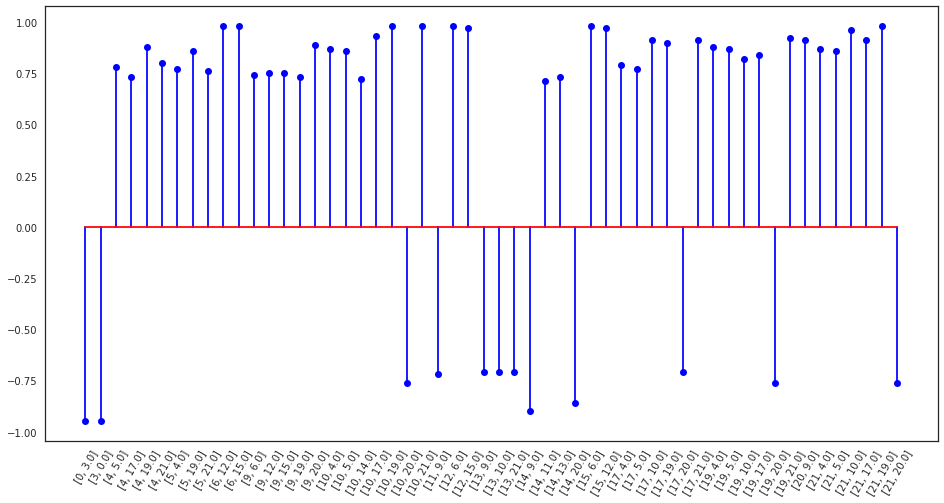

In [644]:
x = []
y = []
for corr in get_most_corr_var(0.7, dist[2]):
    x.append([int(corr[0]), corr[1]])
    y.append(corr[2])
    
x_number = [i for i in np.arange(0, len(y))]
labels = [str(i) for i in x]
plt.figure(figsize=(16,8))
plt.stem(x_number,y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xticks(x_number, labels, rotation='60')
plt.show()

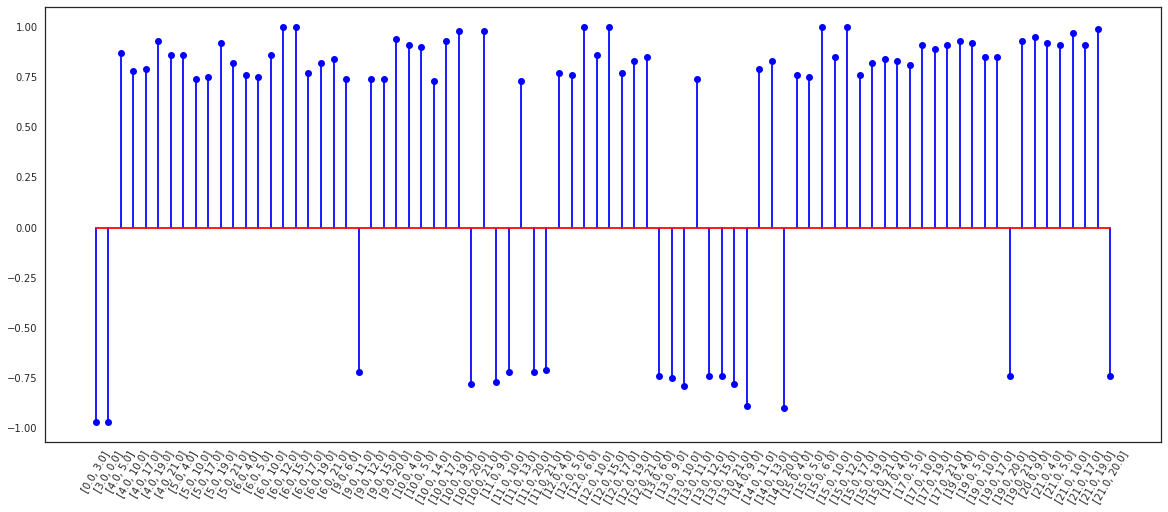

In [668]:
x = []
y = []
for corr in get_most_corr_var(0.7, dist[3]):
    x.append([corr[0],corr[1]])
    y.append(corr[2])
    
x_number = [i for i in np.arange(0, len(y))]
labels = [str(i) for i in x]
plt.figure(figsize=(20,8))
plt.stem(x_number,y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xticks(x_number, labels, rotation='60')
plt.show()

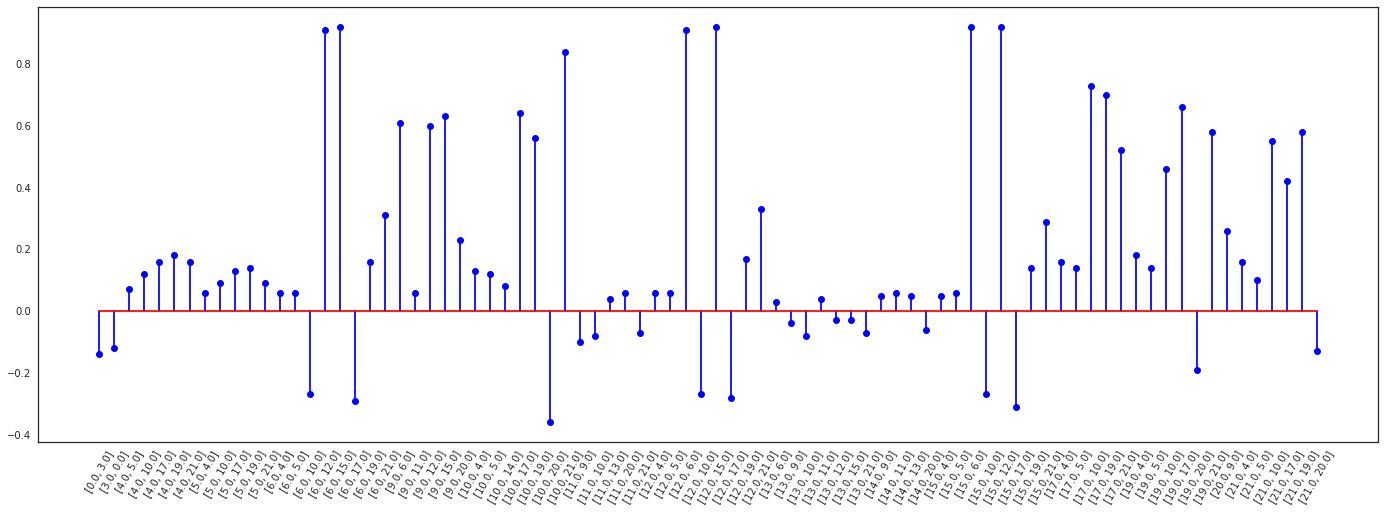

In [673]:
no_dist_y = get_corr_var(correlation_no_dist,x)    
x_number = [i for i in np.arange(0, len(y))]
labels = [str(i) for i in x]
plt.figure(figsize=(24,8))
plt.stem(x_number,no_dist_y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xticks(x_number, labels, rotation='60')
plt.show()

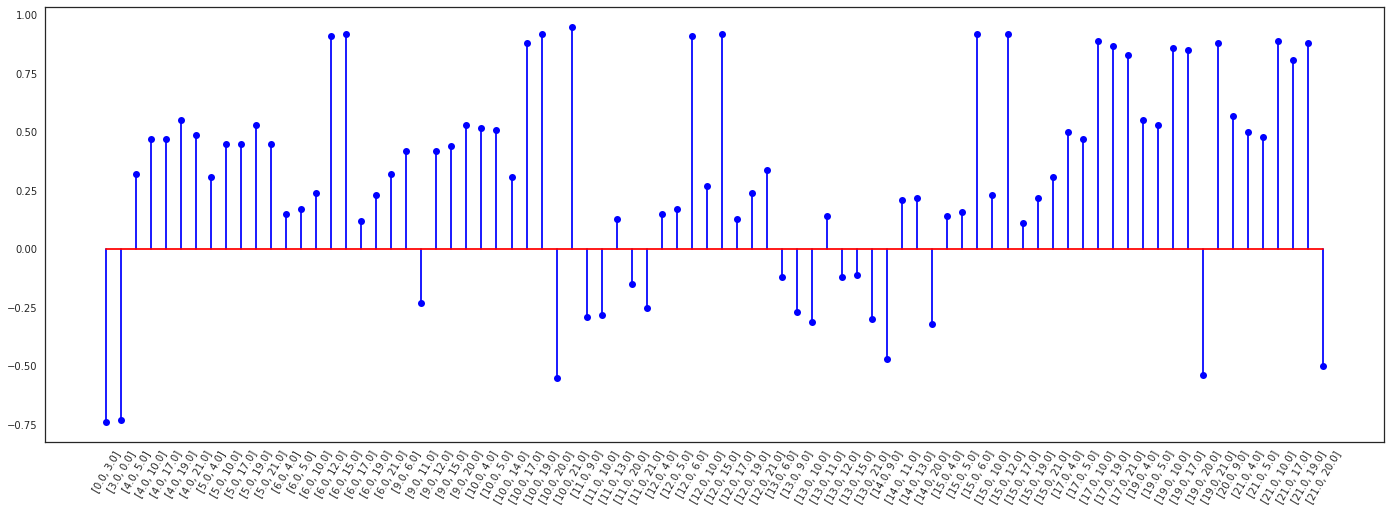

In [675]:
dist_25_y = get_corr_var(dist[0],x)    
x_number = [i for i in np.arange(0, len(y))]
labels = [str(i) for i in x]
plt.figure(figsize=(24,8))
plt.stem(x_number,dist_25_y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xticks(x_number, labels, rotation='60')
plt.show()

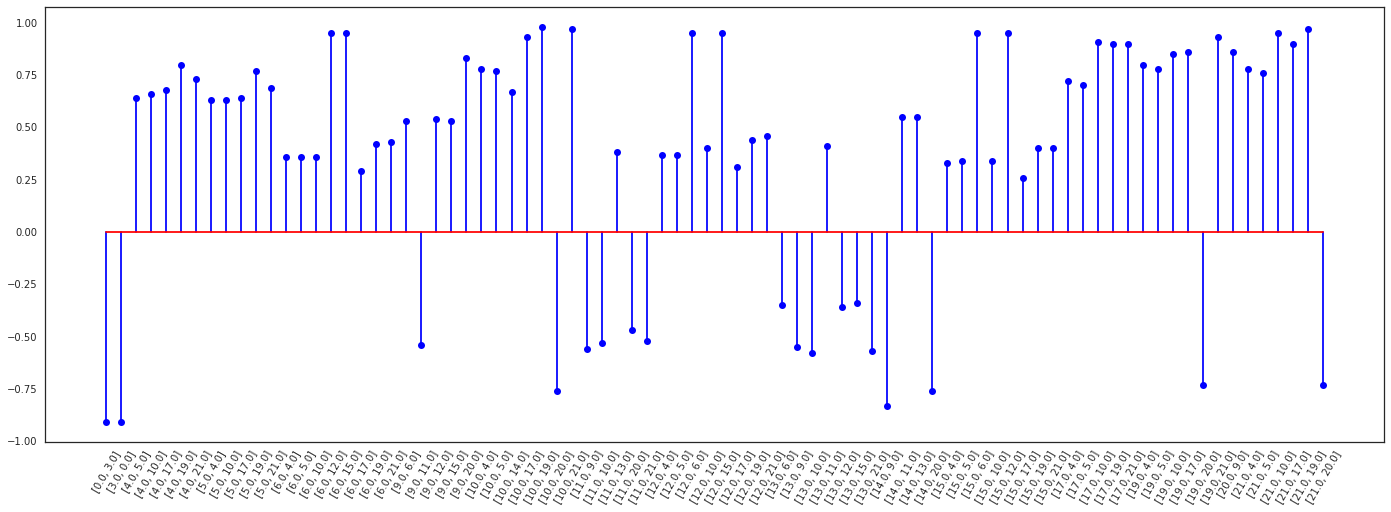

In [676]:
dist_50_y = get_corr_var(dist[1],x)    
x_number = [i for i in np.arange(0, len(y))]
labels = [str(i) for i in x]
plt.figure(figsize=(24,8))
plt.stem(x_number,dist_50_y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xticks(x_number, labels, rotation='60')
plt.show()

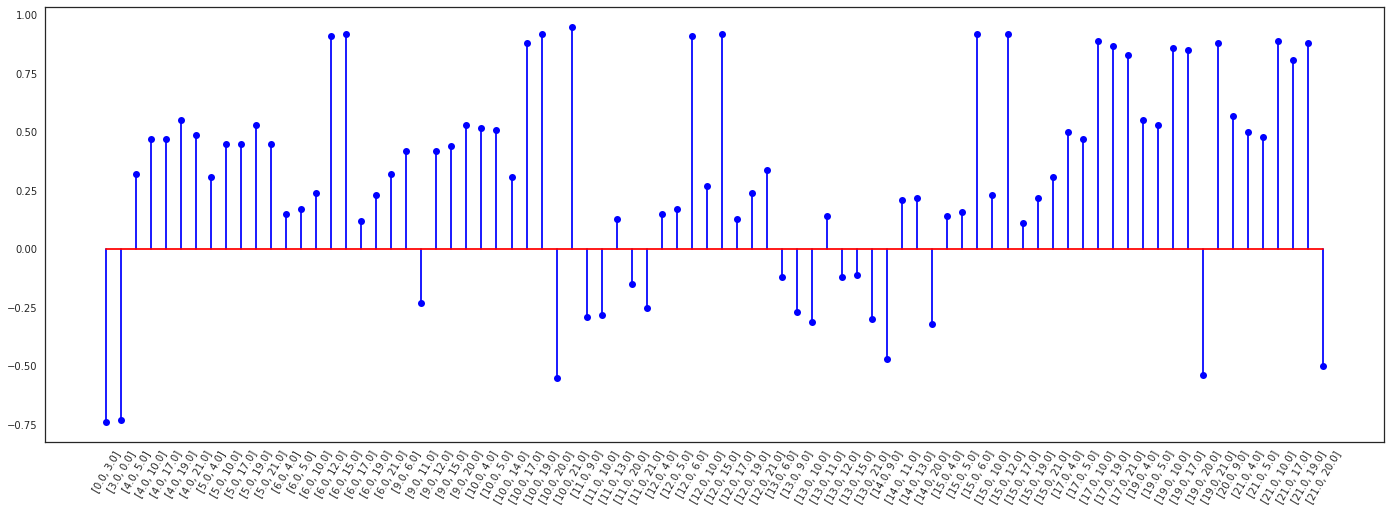

In [699]:
dist_75_y = get_corr_var(dist[2],x)    
x_number = [i for i in np.arange(0, len(y))]
labels = [str(i) for i in x]
plt.figure(figsize=(24,8))
plt.stem(x_number,dist_25_y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xticks(x_number, labels, rotation='60')
plt.show()

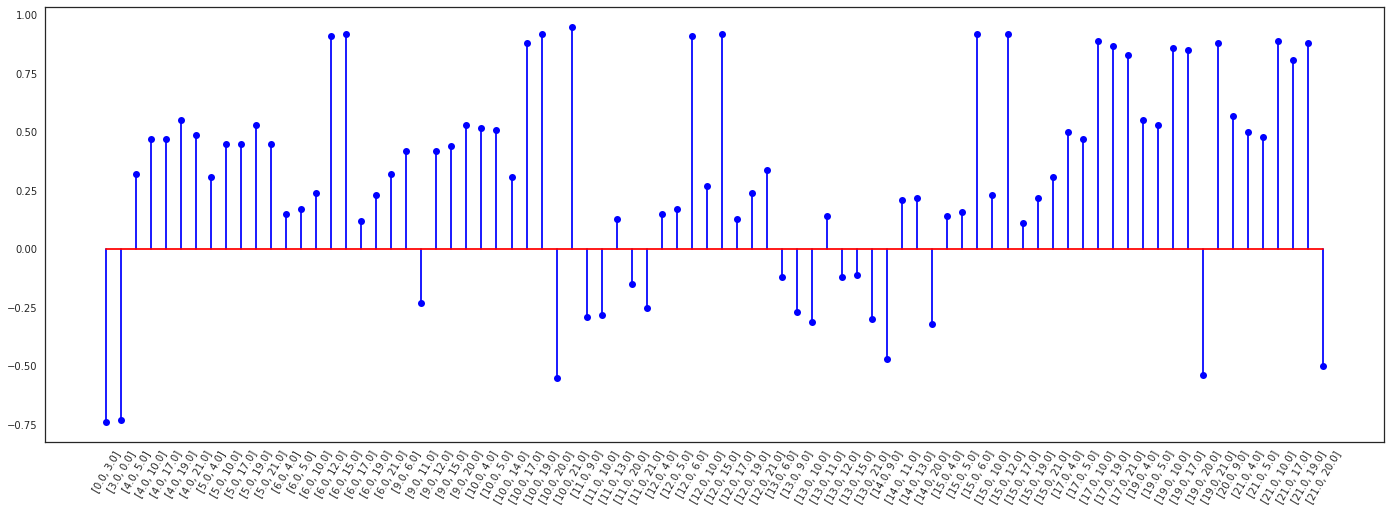

In [700]:
dist_100_y = get_corr_var(dist[3],x)    
x_number = [i for i in np.arange(0, len(y))]
labels = [str(i) for i in x]
plt.figure(figsize=(24,8))
plt.stem(x_number,dist_25_y, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xticks(x_number, labels, rotation='60')
plt.show()

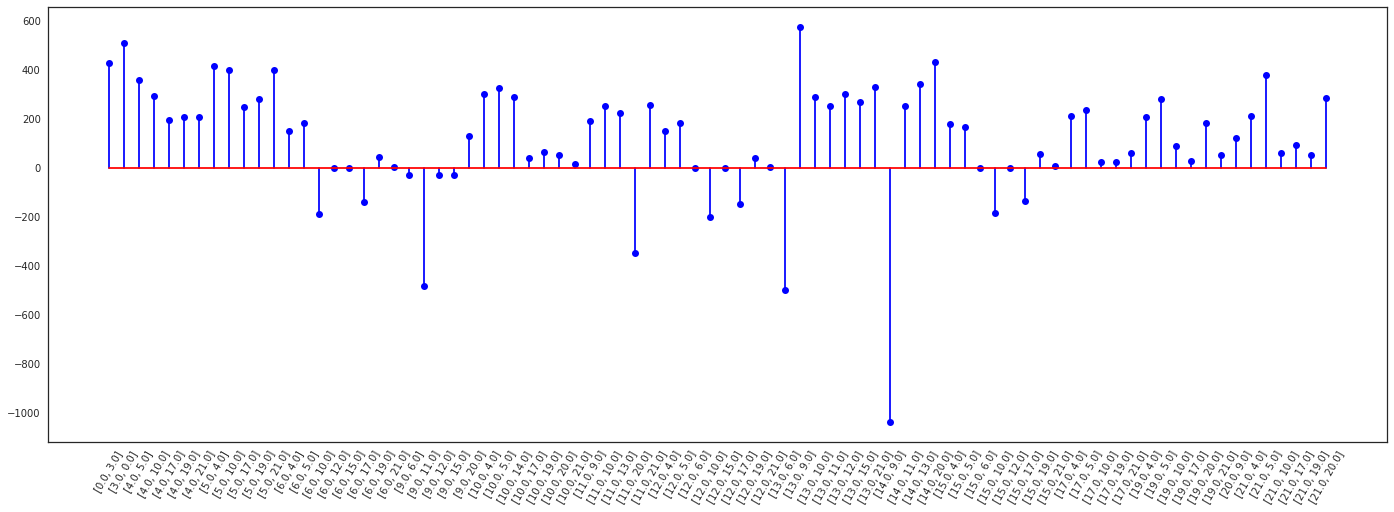

In [697]:
y_diff_0_25 = [(d2 - d1)*100/d1 for d2, d1 in zip(dist_25_y,no_dist_y)]
x_number = [i for i in np.arange(0, len(y))]
labels = [str(i) for i in x]
plt.figure(figsize=(24,8))
plt.stem(x_number,y_diff_0_25, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xticks(x_number, labels, rotation='60')
plt.show()

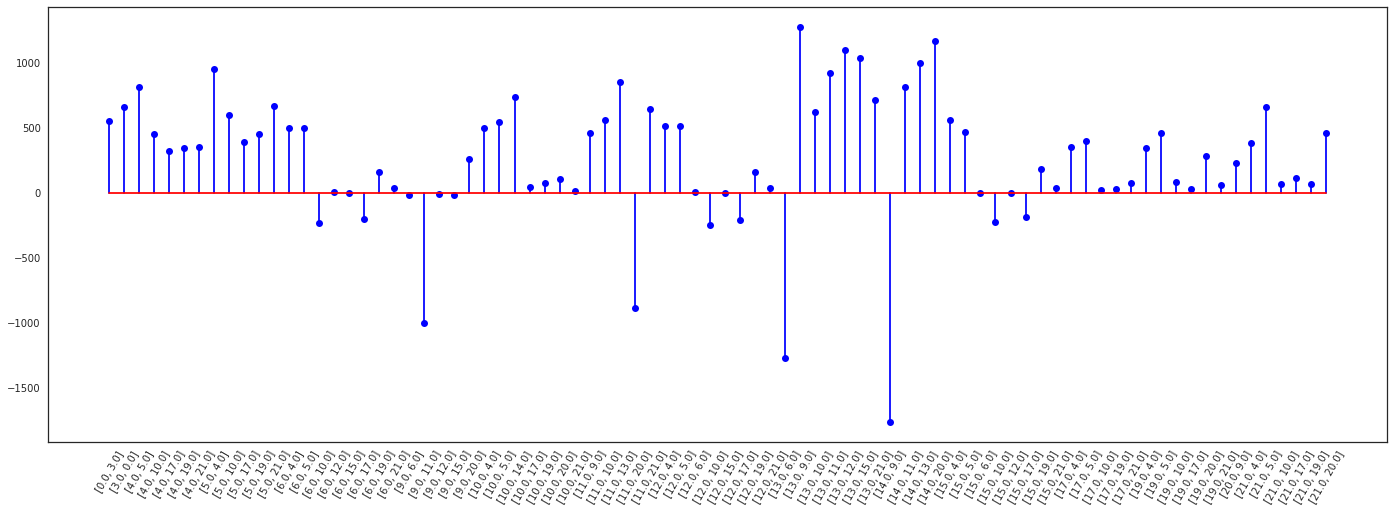

In [698]:
y_diff_0_50 = [(d2 - d1)*100/d1 for d2, d1 in zip(dist_50_y,no_dist_y)]
x_number = [i for i in np.arange(0, len(y))]
labels = [str(i) for i in x]
plt.figure(figsize=(24,8))
plt.stem(x_number,y_diff_0_50, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xticks(x_number, labels, rotation='60')
plt.show()

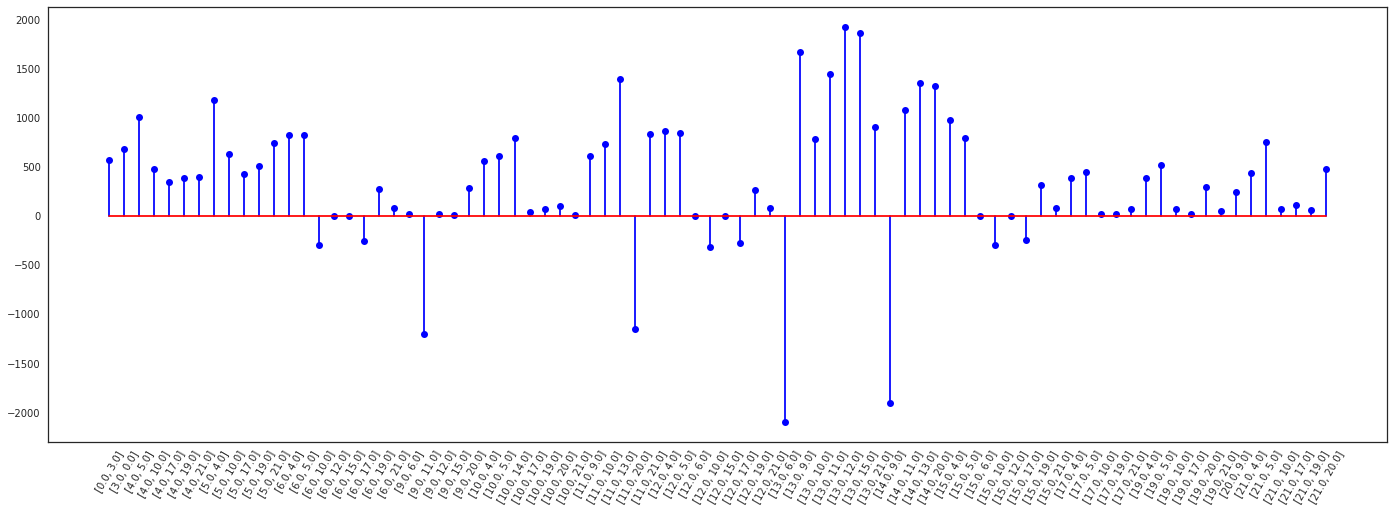

In [709]:
y_diff_0_75 = [(d2 - d1)*100/d1 for d2, d1 in zip(dist_75_y,no_dist_y)]
x_number = [i for i in np.arange(0, len(y))]
labels = [str(i) for i in x]
plt.figure(figsize=(24,8))
plt.stem(x_number,y_diff_0_75, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xticks(x_number, labels, rotation='60')
plt.show()

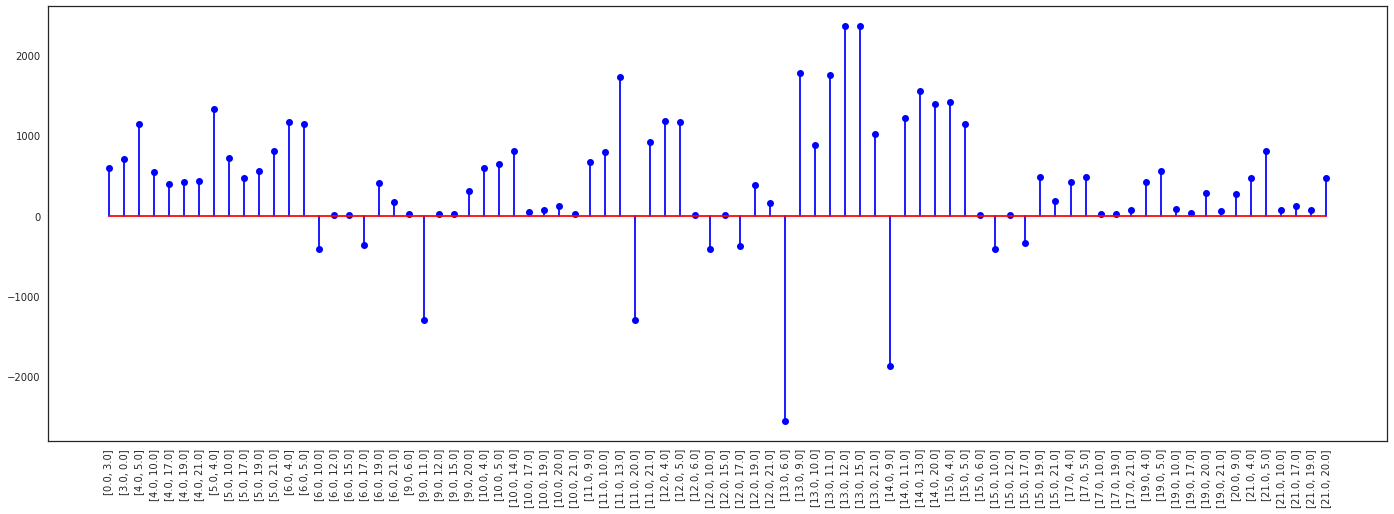

In [715]:
y_diff_0_100 = [(d2 - d1)*100/d1 for d2, d1 in zip(dist_100_y,no_dist_y)]
x_number = [i for i in np.arange(0, len(y))]
labels = [str(i) for i in x]
plt.figure(figsize=(24,8))
plt.stem(x_number,y_diff_0_100, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xticks(x_number, labels, rotation='90')
plt.show()

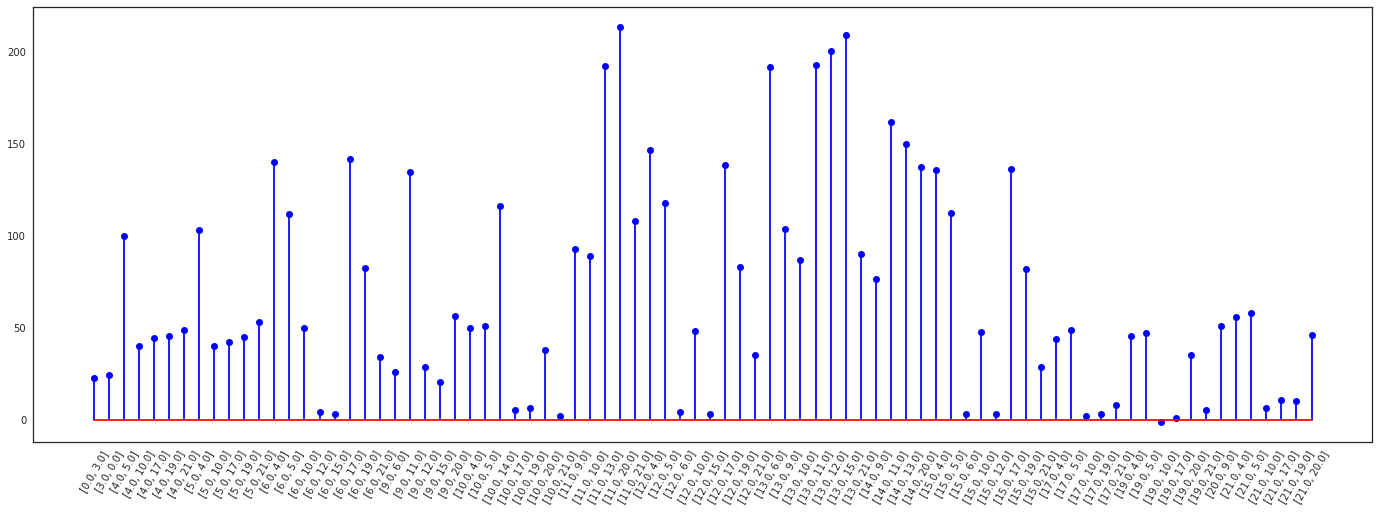

In [713]:
y_diff_25_50 = [(d2 - d1)*100/d1 for d2, d1 in zip(dist_50_y,dist_25_y)]
x_number = [i for i in np.arange(0, len(y))]
labels = [str(i) for i in x]
plt.figure(figsize=(24,8))
plt.stem(x_number,y_diff_25_50, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xticks(x_number, labels, rotation='60')
plt.show()

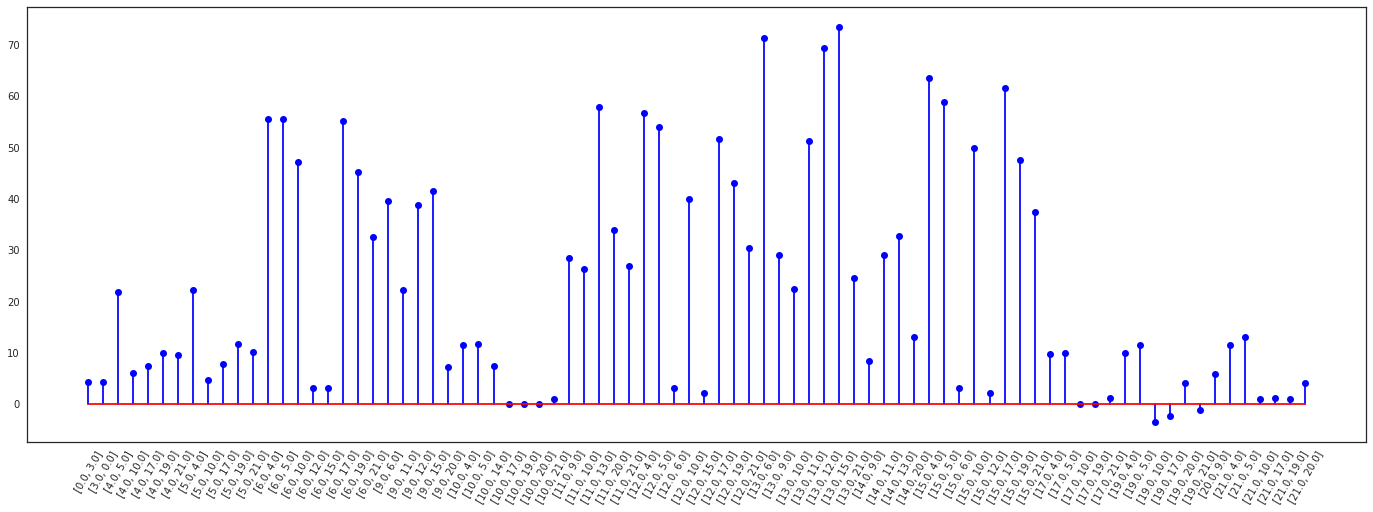

In [714]:
y_diff_50_75 = [(d2 - d1)*100/d1 for d2, d1 in zip(dist_75_y,dist_50_y)]
x_number = [i for i in np.arange(0, len(y))]
labels = [str(i) for i in x]
plt.figure(figsize=(24,8))
plt.stem(x_number,y_diff_50_75, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xticks(x_number, labels, rotation='60')
plt.show()

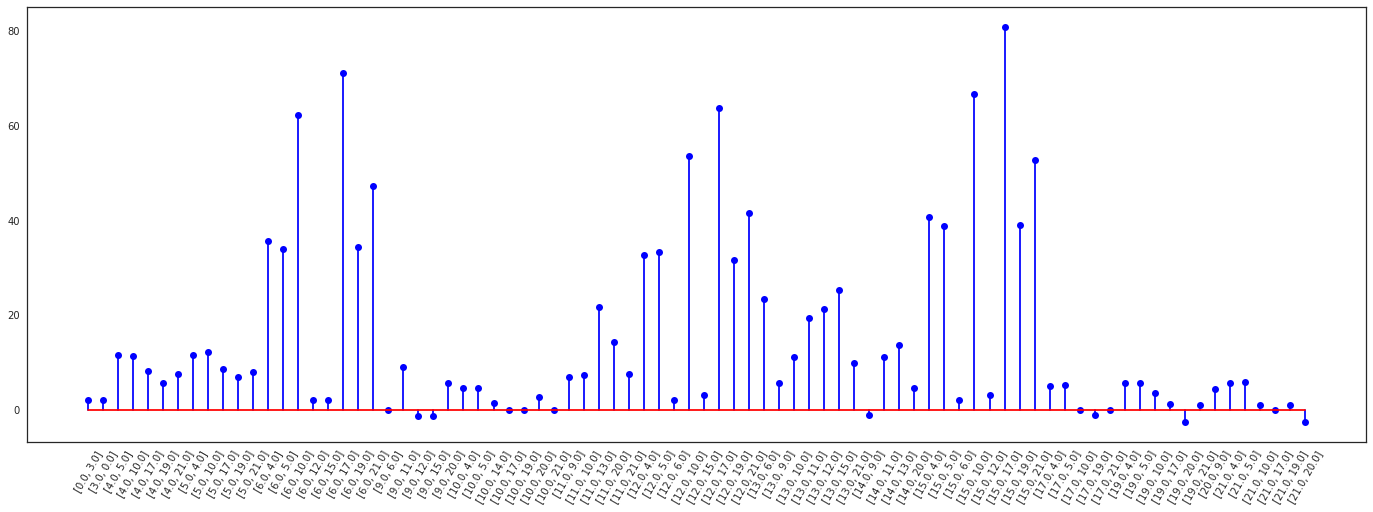

In [710]:
y_diff_75_100 = [(d2 - d1)*100/d1 for d2, d1 in zip(dist_100_y,dist_75_y)]
x_number = [i for i in np.arange(0, len(y))]
labels = [str(i) for i in x]
plt.figure(figsize=(24,8))
plt.stem(x_number,y_diff_75_100, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xticks(x_number, labels, rotation='60')
plt.show()

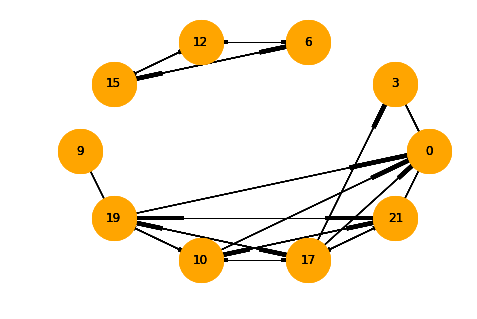

In [65]:
G.add_edges_from(graph_data_corr)
nx.draw_shell(G, with_labels=True, node_size=2000 , arrows=True, node_color='orange', lineheight=0.25)
plt.show()

In [20]:
x_0 =[]
y_0  = []
m = get_most_corr_var(dist[0])
for corr in m:
    x_0.append([corr[0],corr[1]])
    y_0.append(corr[2])

In [ ]:
x_0_index = [i for i in np.arange(0, len(y_0))]
labels = x_0
plt.figure(figsize=(20,12))
plt.stem(x_0_index,y_0, linefmt='b-', markerfmt='bo', basefmt='r-')
plt.xticks(x_0_index, labels, rotation='vertical')
plt.show()

In [ ]:
G = nx.MultiDiGraph()
G.add_edges_from(most_correlated)
nx.draw_shell(G, with_labels=True, node_size=1500 , arrows=True, node_color='orange', lineheight=0.25)
plt.show()

In [1062]:
import graph_tool